<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/practice_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# **Classification Tree**

In [ ]:
# read data from file
df = pd.read_csv('data01_iris.csv')
X = df.iloc[:,:-1]
Y = df['Species']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=1) 

In [ ]:
# classification tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
yhat_train = clf.predict(xtrain)
yhat_train_prob = clf.predict_proba(xtrain)
yhat_test = clf.predict(xtest)
yhat_test_prob = clf.predict_proba(xtest)
clf.score(xtrain,ytrain)
clf.score(xtest,ytest)

# make data dirty
np.random.seed(0)
xtrain2 = xtrain + np.random.randn(np.prod(xtrain.shape)).reshape(90,4)
xtest2 = xtest + np.random.randn(np.prod(xtest.shape)).reshape(60,4)

# classification tree
clf = DecisionTreeClassifier(max_leaf_nodes=None) # change max_leaef_nodes
clf.fit(xtrain2,ytrain)
clf.score(xtrain2,ytrain)
clf.score(xtest2,ytest)

# visualization
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot', max_depth=None,
                feature_names=xtrain.columns,
                class_names=['setosa','versicolor','virginica'])
# to visualize, use http://www.webgraphviz.com/ or other tools

# **Regression Tree**

In [ ]:
# read data
df = pd.read_csv('data05_boston.csv')
X, Y = df.iloc[:,:-1], df['medv']
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.33,random_state=0)

In [ ]:
# regression tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_leaf_nodes=15) # change max_leaf_nodes # None -> 15
s1=clf.fit(xtrain,ytrain)
s2=clf.score(xtrain,ytrain)
s3=clf.score(xtest,ytest)
print(s1, s2, s3)

DecisionTreeRegressor(max_leaf_nodes=15) 0.904948834417056 0.7156774205616943


In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)
lm.score(xtrain,ytrain)
lm.score(xtest,ytest)

0.670579541257879

In [ ]:
# visualization
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot', max_depth=None,
                feature_names=xtrain.columns,
                class_names=['setosa','versicolor','virginica'])
# to visualize, use http://www.webgraphviz.com/ or other tools

In [ ]:
#tree 그리는 사이트
#http://www.jdolivet.byethost13.com/Logiciels/WebGraphviz/
'''digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="lstat <= 7.875\nsquared_error = 86.039\nsamples = 339\nvalue = 22.821"] ;
1 [label="rm <= 7.435\nsquared_error = 80.999\nsamples = 113\nvalue = 31.76"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="dis <= 1.485\nsquared_error = 37.16\nsamples = 90\nvalue = 28.451"] ;
1 -> 3 ;
7 [label="squared_error = 0.0\nsamples = 3\nvalue = 50.0"] ;
3 -> 7 ;
8 [label="rm <= 6.797\nsquared_error = 21.878\nsamples = 87\nvalue = 27.708"] ;
3 -> 8 ;
9 [label="rm <= 6.532\nsquared_error = 8.698\nsamples = 55\nvalue = 25.169"] ;
8 -> 9 ;
17 [label="squared_error = 2.685\nsamples = 34\nvalue = 23.682"] ;
9 -> 17 ;
18 [label="squared_error = 9.062\nsamples = 21\nvalue = 27.576"] ;
9 -> 18 ;
10 [label="ptratio <= 19.45\nsquared_error = 14.406\nsamples = 32\nvalue = 32.072"] ;
8 -> 10 ;
23 [label="squared_error = 10.327\nsamples = 29\nvalue = 32.786"] ;
10 -> 23 ;
24 [label="squared_error = 1.229\nsamples = 3\nvalue = 25.167"] ;
10 -> 24 ;
4 [label="ptratio <= 18.3\nsquared_error = 42.031\nsamples = 23\nvalue = 44.709"] ;
1 -> 4 ;
13 [label="squared_error = 14.587\nsamples = 21\nvalue = 46.248"] ;
4 -> 13 ;
14 [label="squared_error = 44.222\nsamples = 2\nvalue = 28.55"] ;
4 -> 14 ;
2 [label="lstat <= 15.0\nsquared_error = 28.623\nsamples = 226\nvalue = 18.351"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="rm <= 6.605\nsquared_error = 15.993\nsamples = 119\nvalue = 21.754"] ;
2 -> 5 ;
11 [label="tax <= 208.0\nsquared_error = 8.802\nsamples = 104\nvalue = 20.905"] ;
5 -> 11 ;
21 [label="squared_error = 31.135\nsamples = 6\nvalue = 25.983"] ;
11 -> 21 ;
22 [label="squared_error = 5.759\nsamples = 98\nvalue = 20.594"] ;
11 -> 22 ;
12 [label="black <= 395.585\nsquared_error = 26.208\nsamples = 15\nvalue = 27.64"] ;
5 -> 12 ;
19 [label="squared_error = 14.34\nsamples = 13\nvalue = 28.985"] ;
12 -> 19 ;
20 [label="squared_error = 15.21\nsamples = 2\nvalue = 18.9"] ;
12 -> 20 ;
6 [label="crim <= 5.769\nsquared_error = 15.468\nsamples = 107\nvalue = 14.566"] ;
2 -> 6 ;
15 [label="nox <= 0.531\nsquared_error = 10.546\nsamples = 56\nvalue = 16.675"] ;
6 -> 15 ;
27 [label="squared_error = 6.142\nsamples = 12\nvalue = 19.825"] ;
15 -> 27 ;
28 [label="squared_error = 8.303\nsamples = 44\nvalue = 15.816"] ;
15 -> 28 ;
16 [label="lstat <= 20.195\nsquared_error = 10.63\nsamples = 51\nvalue = 12.251"] ;
6 -> 16 ;
25 [label="squared_error = 6.504\nsamples = 25\nvalue = 14.036"] ;
16 -> 25 ;
26 [label="squared_error = 8.587\nsamples = 26\nvalue = 10.535"] ;
16 -> 26 ;
}'''
#위의 내용을 복붙하면, 트리를 자동으로 그려준다.

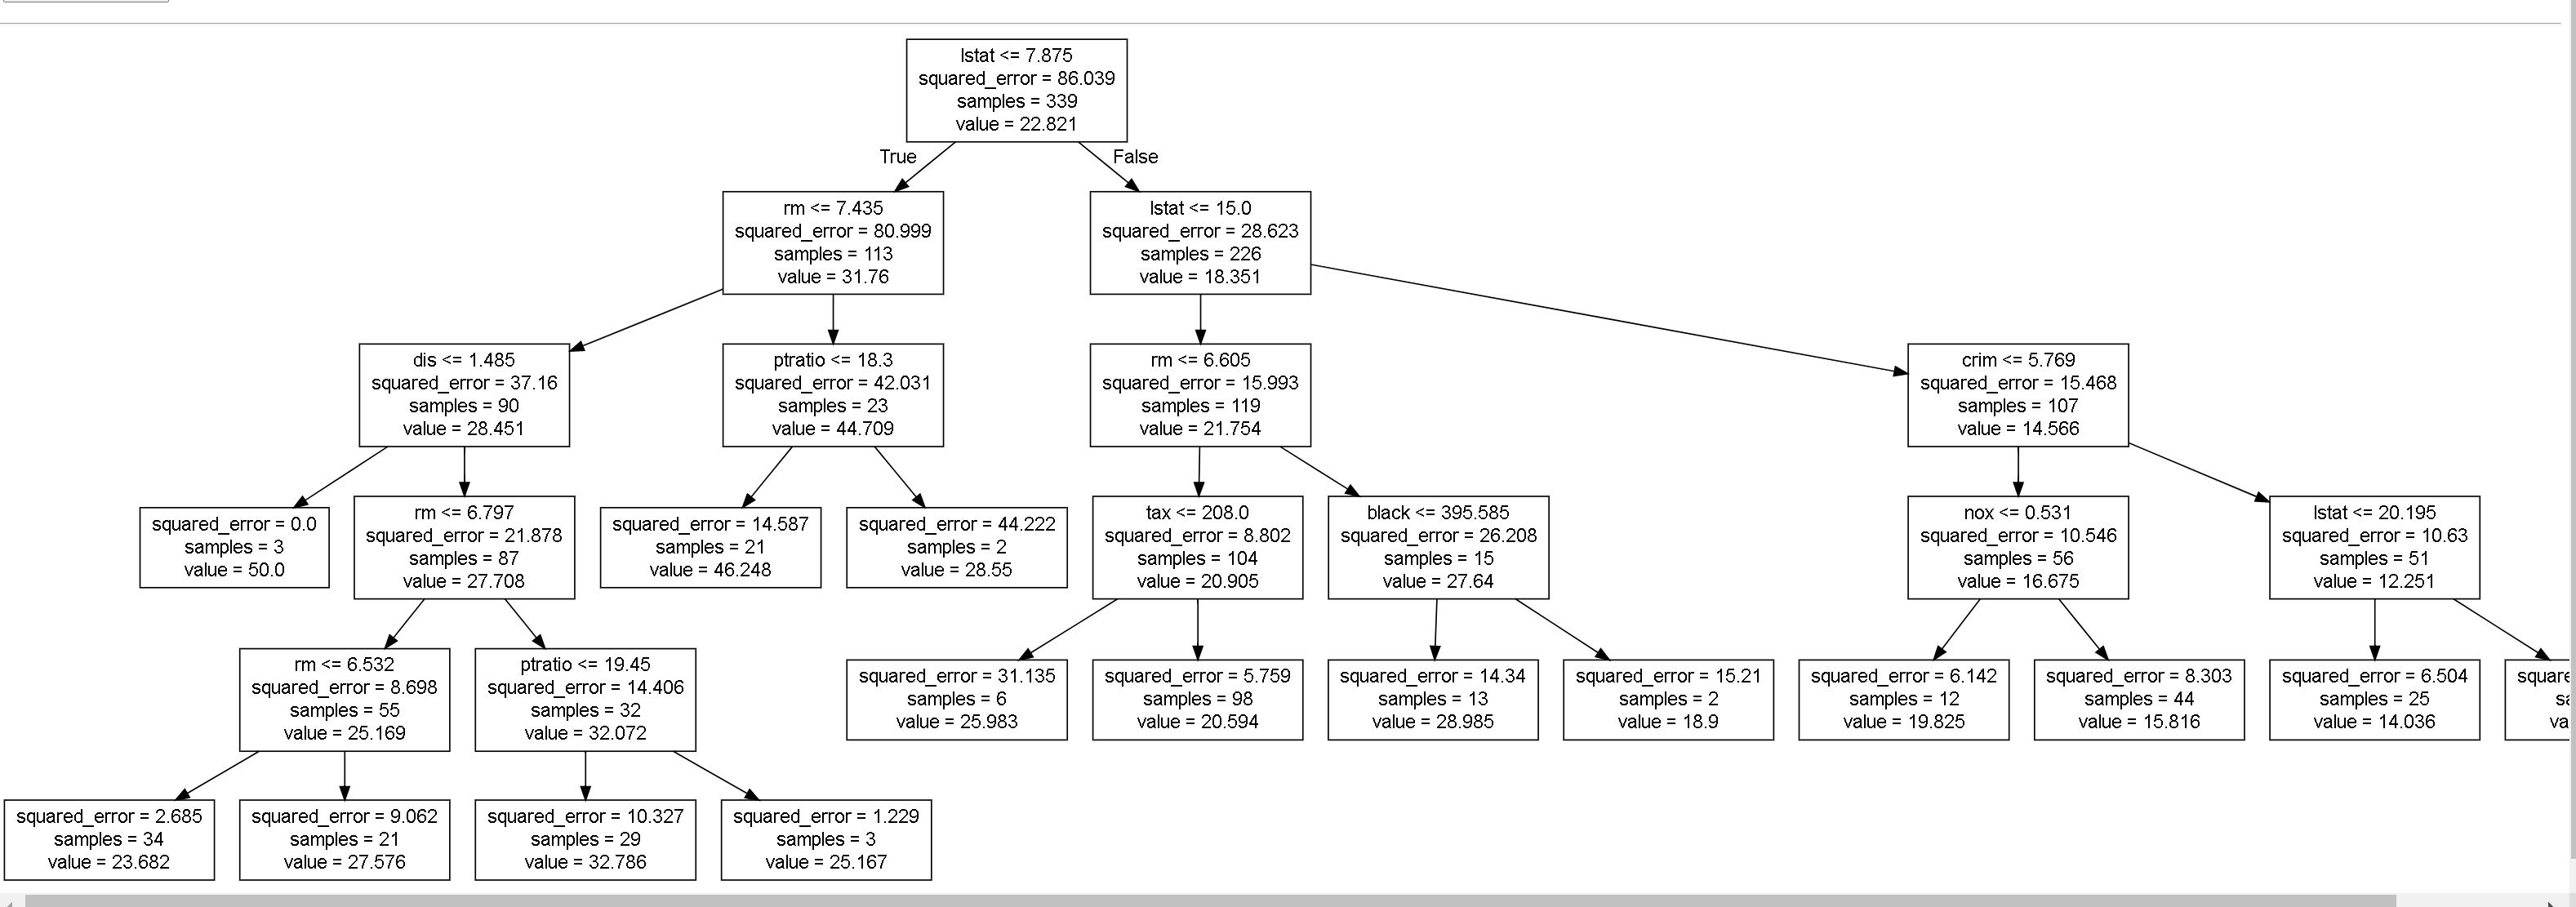